##**Para traer el CSV se hace directamente con una cuenta de Google**

In [1]:
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)


Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=kvopk9uEsPiaKMlrgtVJGNUxo5bpzj&prompt=consent&access_type=offline&code_challenge=KdwLtCJRz33oDTNIMurFNhhpBrYyhPLVs0raFnIya1M&code_challenge_method=S256

Enter verification code: 4/1AX4XfWg8vmAmVzHb5kzUFod85aSkWe8eiuEuWmnIEK8AqyD7ayMeWAjXVeU


## **Se da el link del cual se quiere traer el csv y a traves de pandas se obtiene el dataframe**

In [ ]:
link = 'https://drive.google.com/file/d/1uR5s0ol8E1nR_qAMu5iGzwNloRZip8xK/view?usp=s'
  
import pandas as pd 
  
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('Reviews.csv')   



In [ ]:
  
df = pd.read_csv('Reviews.csv',sep=',') 
df.head(8)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...


In [ ]:
cantDatos=df.shape
print(cantDatos)

(568454, 10)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

# **Verificar las calificaciones dadas para trabajar e identificar la cantidad de comentarios que hay por cada una de las calificaciones**

In [ ]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [ ]:
df['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

### **Se revisan valores duplicados dentro del dataframe y se mantiene el primero, al ejecutarlo por 'ProductId' se evidencio un cambio en el data frame pero al revisar que muchos de los comentarios estan ligados por el mismo producto se realizo mediante algunas otras variables como: ['UserId','ProductId', 'Profilename', 'Time', 'Score'] Se obtienen los mismos resultados es decir  568454 filas**

In [ ]:
df = df.drop_duplicates(df.columns[~df.columns.isin(['UserId','ProductId', 'Profilename', 'Time', 'Score'])],
                        keep='first')


## **Se verifica si existe alguna casilla con datos NaN**


In [ ]:
df_check=df.isna()

check_for_any_nan= df.isna().values.any()
# Or
check_for_any_nan= df.isna().any().any()
total_nan_values = df.isna().sum().sum()
print(df_check)
print("NaN Presence:"+str(check_for_any_nan))
print ("Total Number of NaN values:"+str(total_nan_values))

           Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
0       False      False   False        False                 False   
1       False      False   False        False                 False   
2       False      False   False        False                 False   
3       False      False   False        False                 False   
4       False      False   False        False                 False   
...       ...        ...     ...          ...                   ...   
568449  False      False   False        False                 False   
568450  False      False   False        False                 False   
568451  False      False   False        False                 False   
568452  False      False   False        False                 False   
568453  False      False   False        False                 False   

        HelpfulnessDenominator  Score   Time  Summary   Text  
0                        False  False  False    False  False  
1                    

## **Se eliminan los valores con casillas nulas. Se encuentran 43 valores y quedan 568411 filas**

In [ ]:
df=df.dropna()
print(len(df))

568411


## **Para una mayor relacion al momento de realizar el modelo se deben tomar las muestras de las mismas cantidades**

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64


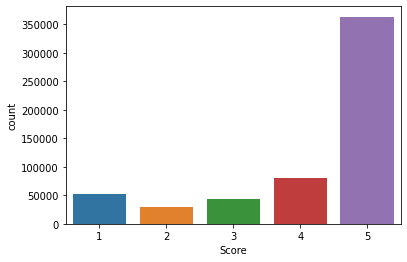

In [ ]:

cuenta = df['Score'].value_counts()
minimo = min(cuenta)
df1=df[df.Score == 5]
df1=df1.sample(minimo)

valor4=df[df.Score == 4]
valor4=valor4.sample(minimo)

valor3=df[df.Score == 3]
valor3=valor3.sample(minimo)

valor2=df[df.Score == 2]
valor2=valor2.sample(minimo)

valor1=df[df.Score == 1]
valor1=valor1.sample(minimo)

df1 = pd.concat([valor1, valor2, valor3, valor4, df1])
df_aleatorio=df1.sample(frac=1).reset_index(drop=True)
#print(df_aleatorio)
#print(df_aleatorio['Score'].value_counts()
print(cuenta)
sb.countplot(x='Score', data=df)


###  Al momento de revisar la cantidad de datos con Score '2' (que es la cantidad minima de datos) se encuentra que son 29769 filas, este dato es importante ya que si se quiere una estabilidad dentro del modelo lo correcto es tomar la misma cantidad de valores aleatorios de los demas Scores. 
###Se conforma un dataframe con la misma cantidad de datos para cada uno de los Scores con una cantidad de 148715 filas. 

###Tambien se puede ver que la mayor cantidad de datos son con Score '5'

3    29743
1    29743
4    29743
2    29743
5    29743
Name: Score, dtype: int64


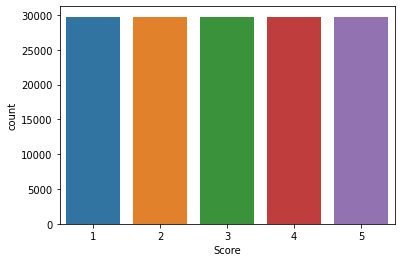

In [ ]:
sb.countplot(x='Score', data=df_aleatorio)
print(df_aleatorio['Score'].value_counts())


## **Para el tratamiento del texto se debe Tokenizar, Eliminar palabras comunes,lemmatizar, quitar puntuacion**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## **Se utiliza libreria NLTK y se traen las STOPWORDS o "palabras comunes"**

In [ ]:
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

punctuation = set(string.punctuation)
all_stopwords = stopwords.words('english')
all_stopwords.append('im')
all_stopwords.append('ive')
print(len(all_stopwords))

181


### Definicion de funciones:
tokenizacion: separar palabras dentro de un texto y ademas elimina puntuacion

Stopwords: Eliminar palabras comunes dentro del texto

Lemmatizar: Eliminar o correguir palabras en sus terminaciones

In [ ]:
def Stopwords(sentencia):
  filtered_word = []
  for word in sentencia:
    if word not in all_stopwords:
      filtered_word.append(word)
  return filtered_word

def tokenizacion(sentencia):
    tokens = []
    for token in sentencia.split():
        new_token = []
        for character in token:
            if character not in punctuation:
                new_token.append(character.lower())
        if new_token:
            tokens.append("".join(new_token))
    salidaok=Stopwords(tokens)
    return salidaok

def lematizar(sentencia):
  lema_word=[]
  for word in sentencia:
    palabra=lemmatizer.lemmatize(word)
    lema_word.append(palabra)
  return lema_word

In [ ]:
data = df_aleatorio.head(len(df_aleatorio))["Text"].apply(tokenizacion)
print(data)

0         [husband, become, critic, gf, granola, bars, d...
1         [ogs, would, touch, dog, food, eat, ceasers, g...
2         [unlike, hot, chocolates, one, obnoxious, tast...
3         [got, 4, 10packs, 6, managers, special, produc...
4         [blend, bitter, taste, earthly, like, drinking...
                                ...                        
148710    [product, arrived, stale, neither, amazon, ven...
148711    [fda, made, illegal, sell, raw, almonds, fall,...
148712    [new, honey, pineapple, mango, awful, worst, t...
148713    [little, treats, small, enough, mouse, pomeran...
148714    [saw, chips, 9, months, ago, bought, bbq, gian...
Name: Text, Length: 148715, dtype: object


In [ ]:
data = data.apply(Stopwords)

In [ ]:
print(lematizar(["trying"]))

['trying']


##**Aplicar las funciones al dataframe**

In [ ]:
data = data.apply(lematizar)
print(data)

0         [husband, become, critic, gf, granola, bar, de...
1         [ogs, would, touch, dog, food, eat, ceasers, g...
2         [unlike, hot, chocolate, one, obnoxious, taste...
3         [got, 4, 10packs, 6, manager, special, product...
4         [blend, bitter, taste, earthly, like, drinking...
                                ...                        
148710    [product, arrived, stale, neither, amazon, ven...
148711    [fda, made, illegal, sell, raw, almond, fall, ...
148712    [new, honey, pineapple, mango, awful, worst, t...
148713    [little, treat, small, enough, mouse, pomerani...
148714    [saw, chip, 9, month, ago, bought, bbq, giant,...
Name: Text, Length: 148715, dtype: object


In [ ]:
df_aleatorio = df_aleatorio.assign(tokenizeText = data)

In [ ]:
df_aleatorio.head(-10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,tokenizeText
0,160089,B000HDJXH6,A32VYURK3JH1O5,Mary Alice Mairet,0,1,3,1260921600,Just OK,My husband has become a critic of GF granola b...,"[husband, become, critic, gf, granola, bar, de..."
1,246382,B0029NN03K,A2CTJ8LCZ2MJV8,Tim Taylor,0,0,1,1339113600,og food,ogs would not touch this dog food.. They will ...,"[ogs, would, touch, dog, food, eat, ceasers, g..."
2,243102,B005K4Q4KG,A35MLHJG9ZRWL7,"Roxie ""Roxie Muzic""",2,2,4,1323129600,If You Are Wondering???,"Unlike the other hot chocolate(s), this one do...","[unlike, hot, chocolate, one, obnoxious, taste..."
3,534521,B001EPQEPU,A29AWXQ9WWSVZX,"granolaking ""Lord of the Granolas""",1,3,1,1271548800,"Sounds interesting, but avoid.",Got 4 10-packs of these for $6 during a manage...,"[got, 4, 10packs, 6, manager, special, product..."
4,107479,B007TJGY4Q,AQ6XS10RR7CE0,"Mike P. ""MAPRX""",0,0,2,1216166400,Bitter Taste,This blend is bitter and does taste earthly l...,"[blend, bitter, taste, earthly, like, drinking..."
...,...,...,...,...,...,...,...,...,...,...,...
148700,568159,B001SB24P4,A3HT7Z4EKASS82,RM,0,0,5,1341100800,Garlic Salt move over...this is way better,WOW.....it's so fresh tasting.<br /><br />If y...,"[wowits, fresh, tastingbr, br, like, garlicthi..."
148701,314290,B008MUJAYC,A2ITY3O2UPJLN8,J. Alec West,0,0,2,1344384000,How many complaints does it take?,"I just sent a complaint to Amazon because, lik...","[sent, complaint, amazon, like, others, get, i..."
148702,518127,B003V8Y7DE,A3SX8T79S8PPQR,chucklelite,0,0,5,1330128000,Simply delicious,This is a great snack with the perfect amount ...,"[great, snack, perfect, amount, salt, dont, fe..."
148703,75229,B0026RQTGE,A3BI6G5Y70AF2I,Jon Paul Nichol,2,2,4,1297814400,Hate to pay the price,"This appeared to be the best price around, but...","[appeared, best, price, around, still, dont, l..."


In [ ]:
df_aleatorio = df_aleatorio.assign(textNum = tokenizetext)

In [ ]:
df_aleatorio.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,tokenizeText,textNum
0,160089,B000HDJXH6,A32VYURK3JH1O5,Mary Alice Mairet,0,1,3,1260921600,Just OK,My husband has become a critic of GF granola b...,"[husband, become, critic, gf, granola, bar, de...",[1101000 1110101 1110011 1100010 1100001 11011...
1,246382,B0029NN03K,A2CTJ8LCZ2MJV8,Tim Taylor,0,0,1,1339113600,og food,ogs would not touch this dog food.. They will ...,"[ogs, would, touch, dog, food, eat, ceasers, g...","[1101111 1100111 1110011, 1110111 1101111 1110..."
2,243102,B005K4Q4KG,A35MLHJG9ZRWL7,"Roxie ""Roxie Muzic""",2,2,4,1323129600,If You Are Wondering???,"Unlike the other hot chocolate(s), this one do...","[unlike, hot, chocolate, one, obnoxious, taste...",[1110101 1101110 1101100 1101001 1101011 11001...


In [ ]:
from sklearn.model_selection import train_test_split
train_text,test_text, train_labels, test_labels = train_test_split(df_aleatorio["Text"], df_aleatorio["Score"], stratify=df_aleatorio["Score"])
print(f"Training examples: {len(train_text)}, testing examples {len(test_text)}")

Training examples: 111536, testing examples 37179


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
real_vectorizer = CountVectorizer(tokenizer = tokenizacion, binary=True)

train_X = real_vectorizer.fit_transform(train_text)
test_X = real_vectorizer.transform(test_text)

train_X.shape

(111536, 101564)

In [ ]:

from sklearn.svm import LinearSVC


In [ ]:
classifier = LinearSVC(max_iter=10000)
classifier.fit(train_X, train_labels)

LinearSVC(max_iter=10000)

In [ ]:
from sklearn.metrics import accuracy_score

predicciones = classifier.predict(test_X)

accuracy = accuracy_score(test_labels, predicciones)

print(f"Accuracy: {accuracy:.4%}")

In [ ]:
muyBueno = "this is fantastic"
neutro = "I think that it can be bad"
muyMalo = "this product was the worst"

examples = [
    muyBueno,
    neutro,
    muyMalo
]

examples_X = real_vectorizer.transform(examples)
predicciones = classifier.predict(examples_X)
print(predicciones)

[5 3 1]
